In [2]:
import pandas as pd

# Adjust the file path as needed
file_path = '/Users/taief/Desktop/MusicTry/DATA/data.csv'
data = pd.read_csv(file_path)

data.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecting the features to use for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
data_selected = data[features]

# Dropping rows with missing values
data_clean = data_selected.dropna()

# Data normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Convert the scaled data back to a DataFrame (optional, for convenience)
data_scaled_df = pd.DataFrame(data_scaled, columns=features)


Number of components selected to retain 90% variance: 8
[0.34178431 0.14773396 0.11444552 0.10040681 0.0886922  0.07411261
 0.05480159 0.03586934]


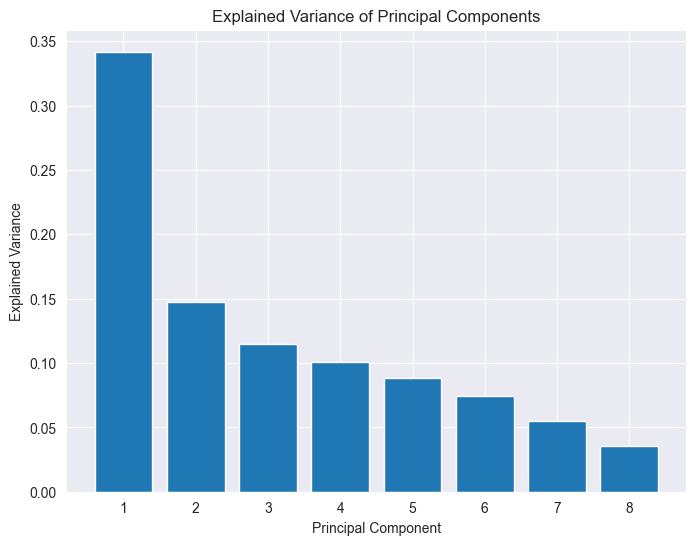

cumulative_variance [0.34178431 0.48951827 0.60396379 0.7043706  0.79306279 0.86717541
 0.92197699 0.95784634]


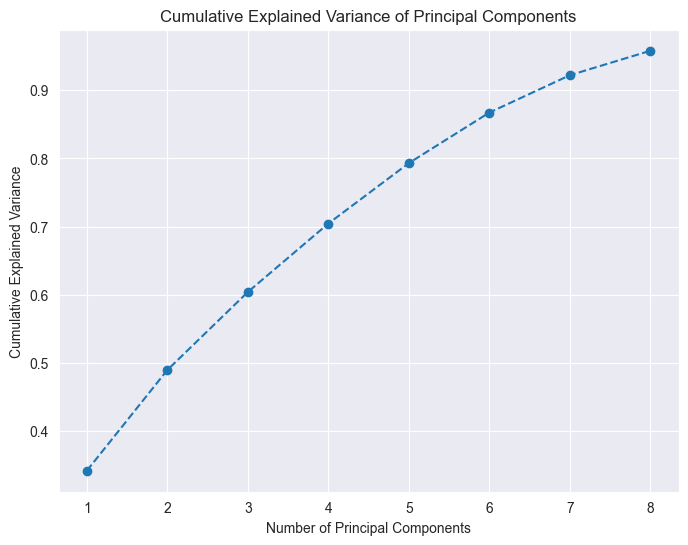

<Figure size 640x480 with 0 Axes>

In [4]:
from sklearn.decomposition import PCA


# Step 1: PCA for Dimensionality Reduction to retain 90% of the variance
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled_df)

# Number of components selected to retain 90% variance
print(f"Number of components selected to retain 90% variance: {pca.n_components_}")

#print variance
print(pca.explained_variance_ratio_)

# Create a bar plot of the explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.title('Explained Variance of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

#cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(f'cumulative_variance',cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/cumulative_explained_variance2.png')

Number of components | Cumulative Variance Explained
----------------------|-------------------------------
         1           | 36.73%
         2           | 50.54%
         3           | 61.66%
         4           | 71.48%
         5           | 79.63%
         6           | 87.41%
         7           | 92.87%
         8           | 96.11%


     acousticness  danceability    energy  instrumentalness  liveness  \
PC1      0.438949     -0.266307 -0.469899          0.293944 -0.023437   
PC2      0.140276      0.550475 -0.148644         -0.155721  0.041302   
PC3     -0.095549     -0.283996  0.127574         -0.105170  0.806887   
PC4      0.170180     -0.100401  0.106109          0.323574  0.121948   
PC5     -0.112671     -0.087810 -0.153874         -0.205907 -0.401315   
PC6     -0.346053      0.098072  0.235372          0.812061 -0.093186   
PC7     -0.066681     -0.383638  0.306100         -0.117066 -0.391612   
PC8     -0.503812     -0.344135  0.033653         -0.201801 -0.021484   

     loudness  speechiness     tempo   valence  popularity  
PC1 -0.452189     0.010696 -0.176725 -0.260982   -0.353150  
PC2 -0.121150     0.529272 -0.084087  0.477615   -0.315050  
PC3  0.021380     0.399237  0.105359 -0.211362   -0.127249  
PC4  0.054571    -0.284716  0.676343  0.427406   -0.325531  
PC5 -0.185962     0.441959  0.651986 

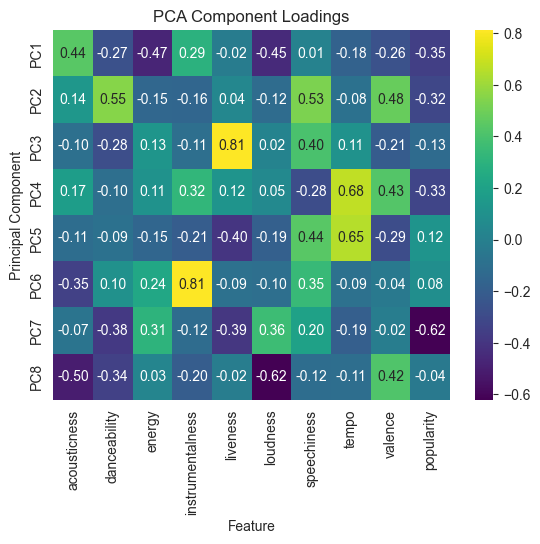

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import seaborn as sns

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame for better visualization
components_df = pd.DataFrame(pca_components, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the DataFrame for interpretation
print(components_df)

sns.heatmap(components_df, cmap='viridis', annot=True, fmt=".2f")
plt.title("PCA Component Loadings")
plt.ylabel("Principal Component")
plt.xlabel("Feature")
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/pca_component_loadings2.png')


In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def hopkins_statistic(X):
    n, d = X.shape
    m = int(0.1 * n)  # Using 10% of the data for the test as a common practice
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = np.random.uniform(X.min(axis=0), X.max(axis=0), (m, d))
    u_dist = np.sum(nbrs.kneighbors(rand_X, return_distance=True)[0])
    w_dist = np.sum(nbrs.kneighbors(X, n_neighbors=2, return_distance=True)[0][:, 1])
    
    H = u_dist / (u_dist + w_dist)
    return H

H = hopkins_statistic(data_pca)
print(f"Hopkins Statistic: {H:.2f}")


Hopkins Statistic: 0.49


In [7]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of possible clusters to evaluate
range_n_clusters = list(range(2, 11))

silhouette_scores_Kmeans = []  

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_pca)  # Use PCA-reduced data
    
    # Calculate the silhouette score and append to list
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    silhouette_scores_Kmeans.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores_Kmeans, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


optimal_clusters = range_n_clusters[silhouette_scores_Kmeans.index(max(silhouette_scores_Kmeans))]
print(f"The optimal number of clusters is: {optimal_clusters}")

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_kmeans2.png')

For n_clusters = 2, the silhouette score is: 0.254354585280909
For n_clusters = 3, the silhouette score is: 0.21116500438670743
For n_clusters = 4, the silhouette score is: 0.1600260570485858
For n_clusters = 5, the silhouette score is: 0.1867140125553343



KeyboardInterrupt



In [ ]:
from mpl_toolkits.mplot3d import Axes3D

optimal_n_clusters = 6
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=10)
kmeans_labels = kmeans.fit_predict(data_pca)

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
                     c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)

# Plot the centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           c='red', s=200, alpha=0.8, label='Centroids')

ax.set_title('KMeans Clustering (PCA-reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

# Assuming 'kmeans' is your fitted KMeans model with the 'kmeans_labels' and 'data_pca' as before

# Create a figure with subplots in a 1x3 grid
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Centroids for the principal components
centroids = kmeans.cluster_centers_

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
axs[0].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
axs[0].set_title('PC1 vs PC2')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].legend()

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
axs[1].scatter(centroids[:, 0], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')
axs[1].set_title('PC1 vs PC3')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')
axs[1].legend()

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
axs[2].scatter(centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')
axs[2].set_title('PC2 vs PC3')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')
axs[2].legend()

# Display the plots
plt.tight_layout()
plt.show()


#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/kmeans_clustering2.png')

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 2: Perform Hierarchical Clustering on the PCA-reduced data
Z_ward = linkage(data_pca, method='ward')

# Step 3: Plot the Hierarchical Clustering Dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (PCA-reduced Data)')
dendrogram(Z_ward, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/hierarchical_clustering_dendrogram2.png')

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Initialize a list to store the silhouette scores
silhouette_scores_ward = []

# Calculate silhouette scores for different numbers of clusters and store them
for n_clusters in range(2, 11):
    # Perform hierarchical clustering for the current number of clusters
    labels = fcluster(Z_ward, n_clusters, criterion='maxclust')
    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores_ward.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")


# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_ward, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11)) 
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_hierarchical_clustering2.png')


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Determining the optimal number of clusters from silhouette scores or dendrogram
n_clusters = 4

# Performing Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = agg_cluster.fit_predict(data_pca)

# 3D Plot for Agglomerative Clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
                     c=agg_labels, cmap='viridis', s=50, alpha=0.6)
ax.set_title('Agglomerative Clustering (PCA-reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

# 2D Subplots for Agglomerative Clustering results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
axs[0].set_title('PC1 vs PC2')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
axs[1].set_title('PC1 vs PC3')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
axs[2].set_title('PC2 vs PC3')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')

# Display the plots
plt.tight_layout()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/agglomerative_clustering2.png')

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform Hierarchical Clustering with 'complete' linkage
Z_complete = linkage(data_pca, method='complete')
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
dendrogram(Z_complete, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/hierarchical_clustering_dendrogram_complete2.png')

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Initialize a list to store the silhouette scores
silhouette_scores_complete = []

# Calculate silhouette scores for different numbers of clusters and store them
for n_clusters in range(2, 11):
    # Perform hierarchical clustering for the current number of clusters
    labels = fcluster(Z_complete, n_clusters, criterion='maxclust')
    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores_complete.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")


# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_complete, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11)) 
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_hierarchical_clustering_complete2.png')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Determining the optimal number of clusters from silhouette scores or dendrogram
n_clusters = 3

# Performing Agglomerative Clustering with 'complete' linkage
agg_cluster_complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
agg_labels_complete = agg_cluster_complete.fit_predict(data_pca)  

# 3D Plot for Agglomerative Clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.6)
ax.set_title('Agglomerative Clustering (PCA-reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 2D Subplots for Agglomerative Clustering results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.5)
axs[0].set_title('PC1 vs PC2')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.5)
axs[1].set_title('PC1 vs PC3')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.5)
axs[2].set_title('PC2 vs PC3')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')

# Display the plots
plt.tight_layout()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/agglomerative_clustering_complete2.png')


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform Hierarchical Clustering with 'complete' linkage
Z_average = linkage(data_pca, method='average')
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
dendrogram(Z_average, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/hierarchical_clustering_dendrogram_average2.png')

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# Initialize a list to store the silhouette scores
silhouette_scores_average = []

# Calculate silhouette scores for different numbers of clusters and store them
for n_clusters in range(2, 11):
    # Perform hierarchical clustering for the current number of clusters
    labels = fcluster(Z_average, n_clusters, criterion='maxclust')
    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores_average.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_average, marker='o', label='Average Linkage')
plt.title('Silhouette Score for Different Number of Clusters (Average Linkage)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.legend()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_hierarchical_clustering_average2.png')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Determining the optimal number of clusters from silhouette scores or dendrogram
n_clusters = 6

# Performing Agglomerative Clustering with 'average' linkage
agg_cluster_avg = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
agg_labels_avg = agg_cluster_avg.fit_predict(data_pca)  # Correctly using 'average' linkage results

# 3D Plot for Agglomerative Clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.6)
ax.set_title('Agglomerative Clustering (Average Linkage) on PCA-reduced Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 2D Subplots for Agglomerative Clustering results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.5)
axs[0].set_title('PC1 vs PC2 (Average Linkage)')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.5)
axs[1].set_title('PC1 vs PC3 (Average Linkage)')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.5)
axs[2].set_title('PC2 vs PC3 (Average Linkage)')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')

# Display the plots
plt.tight_layout()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/agglomerative_clustering_average2.png')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ward_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_ward})
complete_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_complete})
average_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_average})

# Combine all the scores into a single DataFrame
all_scores_df = pd.concat([ward_scores_df, complete_scores_df, average_scores_df], ignore_index=True)

# Add a column for the method
all_scores_df['Method'] = ['Ward Linkage'] * len(range_n_clusters) + ['Complete Linkage'] * len(range_n_clusters) + ['Average Linkage'] * len(range_n_clusters)

# Create a DataFrame for K-Means scores
kmeans_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_Kmeans})
kmeans_scores_df['Method'] = 'K-Means'

# Concatenate all DataFrames
all_scores_df = pd.concat([all_scores_df, kmeans_scores_df], ignore_index=True)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_scores_df, x='Number of Clusters', y='Silhouette Score', hue='Method', marker='o')

plt.title('Silhouette Scores for Different Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend(title='Method')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_scores_for_different_methods.png')

<Figure size 1200x800 with 0 Axes>

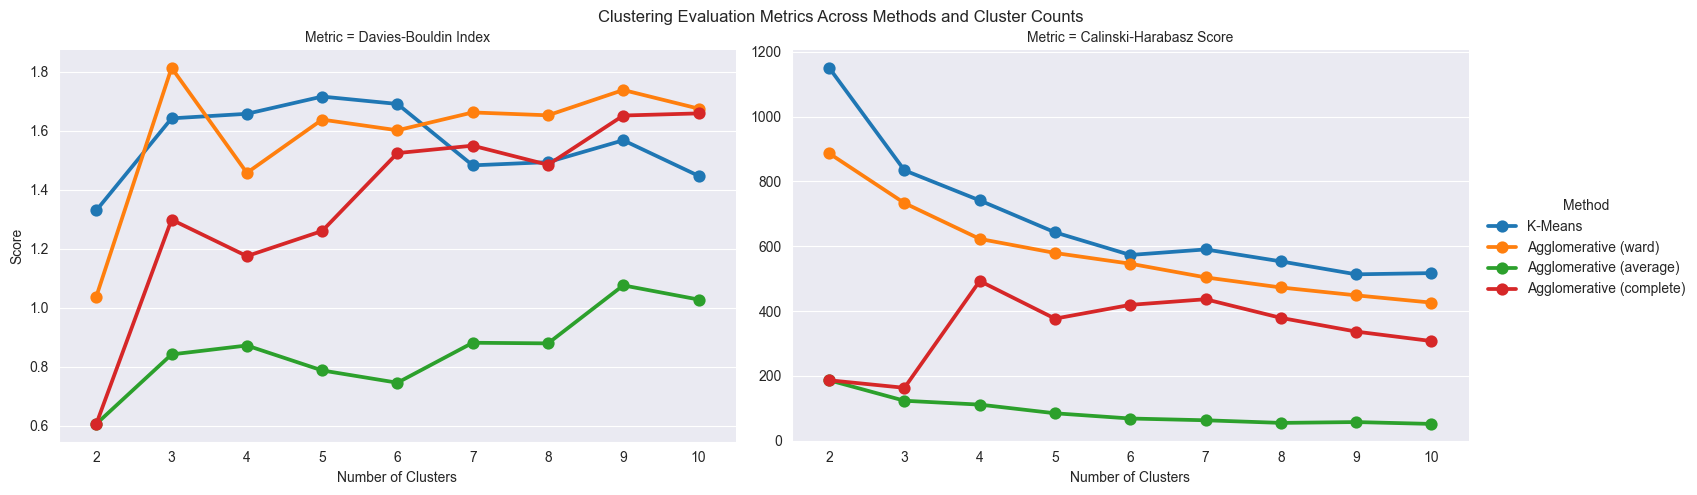

<Figure size 640x480 with 0 Axes>

In [18]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



def calculate_indices(data, cluster_labels):
    davies_bouldin = davies_bouldin_score(data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(data, cluster_labels)
    return davies_bouldin, calinski_harabasz

results = []

# Define the range of cluster numbers to evaluate
cluster_range = range(2, 11)

# Evaluate K-Means
for n_clusters in cluster_range:
    kmeans_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(data_pca)
    db_index, ch_score = calculate_indices(data_pca, kmeans_labels)
    results.append({
        'Method': 'K-Means',
        'Number of Clusters': n_clusters,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Score': ch_score
    })

# Evaluate Agglomerative Clustering for each linkage type
linkages = ['ward', 'average', 'complete']
for linkage in linkages:
    for n_clusters in cluster_range:
        agg_labels = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit_predict(data_pca)
        db_index, ch_score = calculate_indices(data_pca, agg_labels)
        results.append({
            'Method': f'Agglomerative ({linkage})',
            'Number of Clusters': n_clusters,
            'Davies-Bouldin Index': db_index,
            'Calinski-Harabasz Score': ch_score
        })

# Convert the results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Melt the DataFrame to make it suitable for sns.catplot
df_melted = results_df.melt(id_vars=['Method', 'Number of Clusters'], var_name='Metric', value_name='Score')

# Visualization
plt.figure(figsize=(12, 8))
sns.catplot(
    data=df_melted,
    x='Number of Clusters', y='Score', hue='Method', col='Metric',
    kind='point', col_wrap=2, height=5, aspect=1.5, marker='o', linestyles='-',
    sharey=False 
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Clustering Evaluation Metrics Across Methods and Cluster Counts')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/clustering_evaluation_metrics2.png')

In [90]:
#save the results
results_df.to_csv('/Users/taief/Desktop/MusicTry/venv/clustering_evaluation_results.csv', index=False)